# Dataset Information

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

# Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline 

# Loading Dataset

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Statistical information
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
#datatype information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Preprocessing of dataset

In [6]:
#Checking  null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Explorartory Data Analysis

<Axes: ylabel='count'>

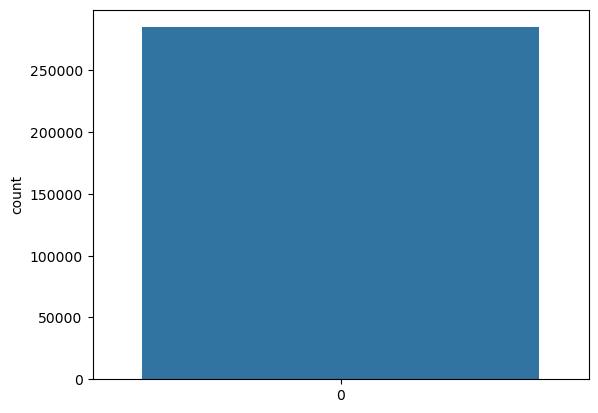

In [7]:
sns.countplot(df['Class'])

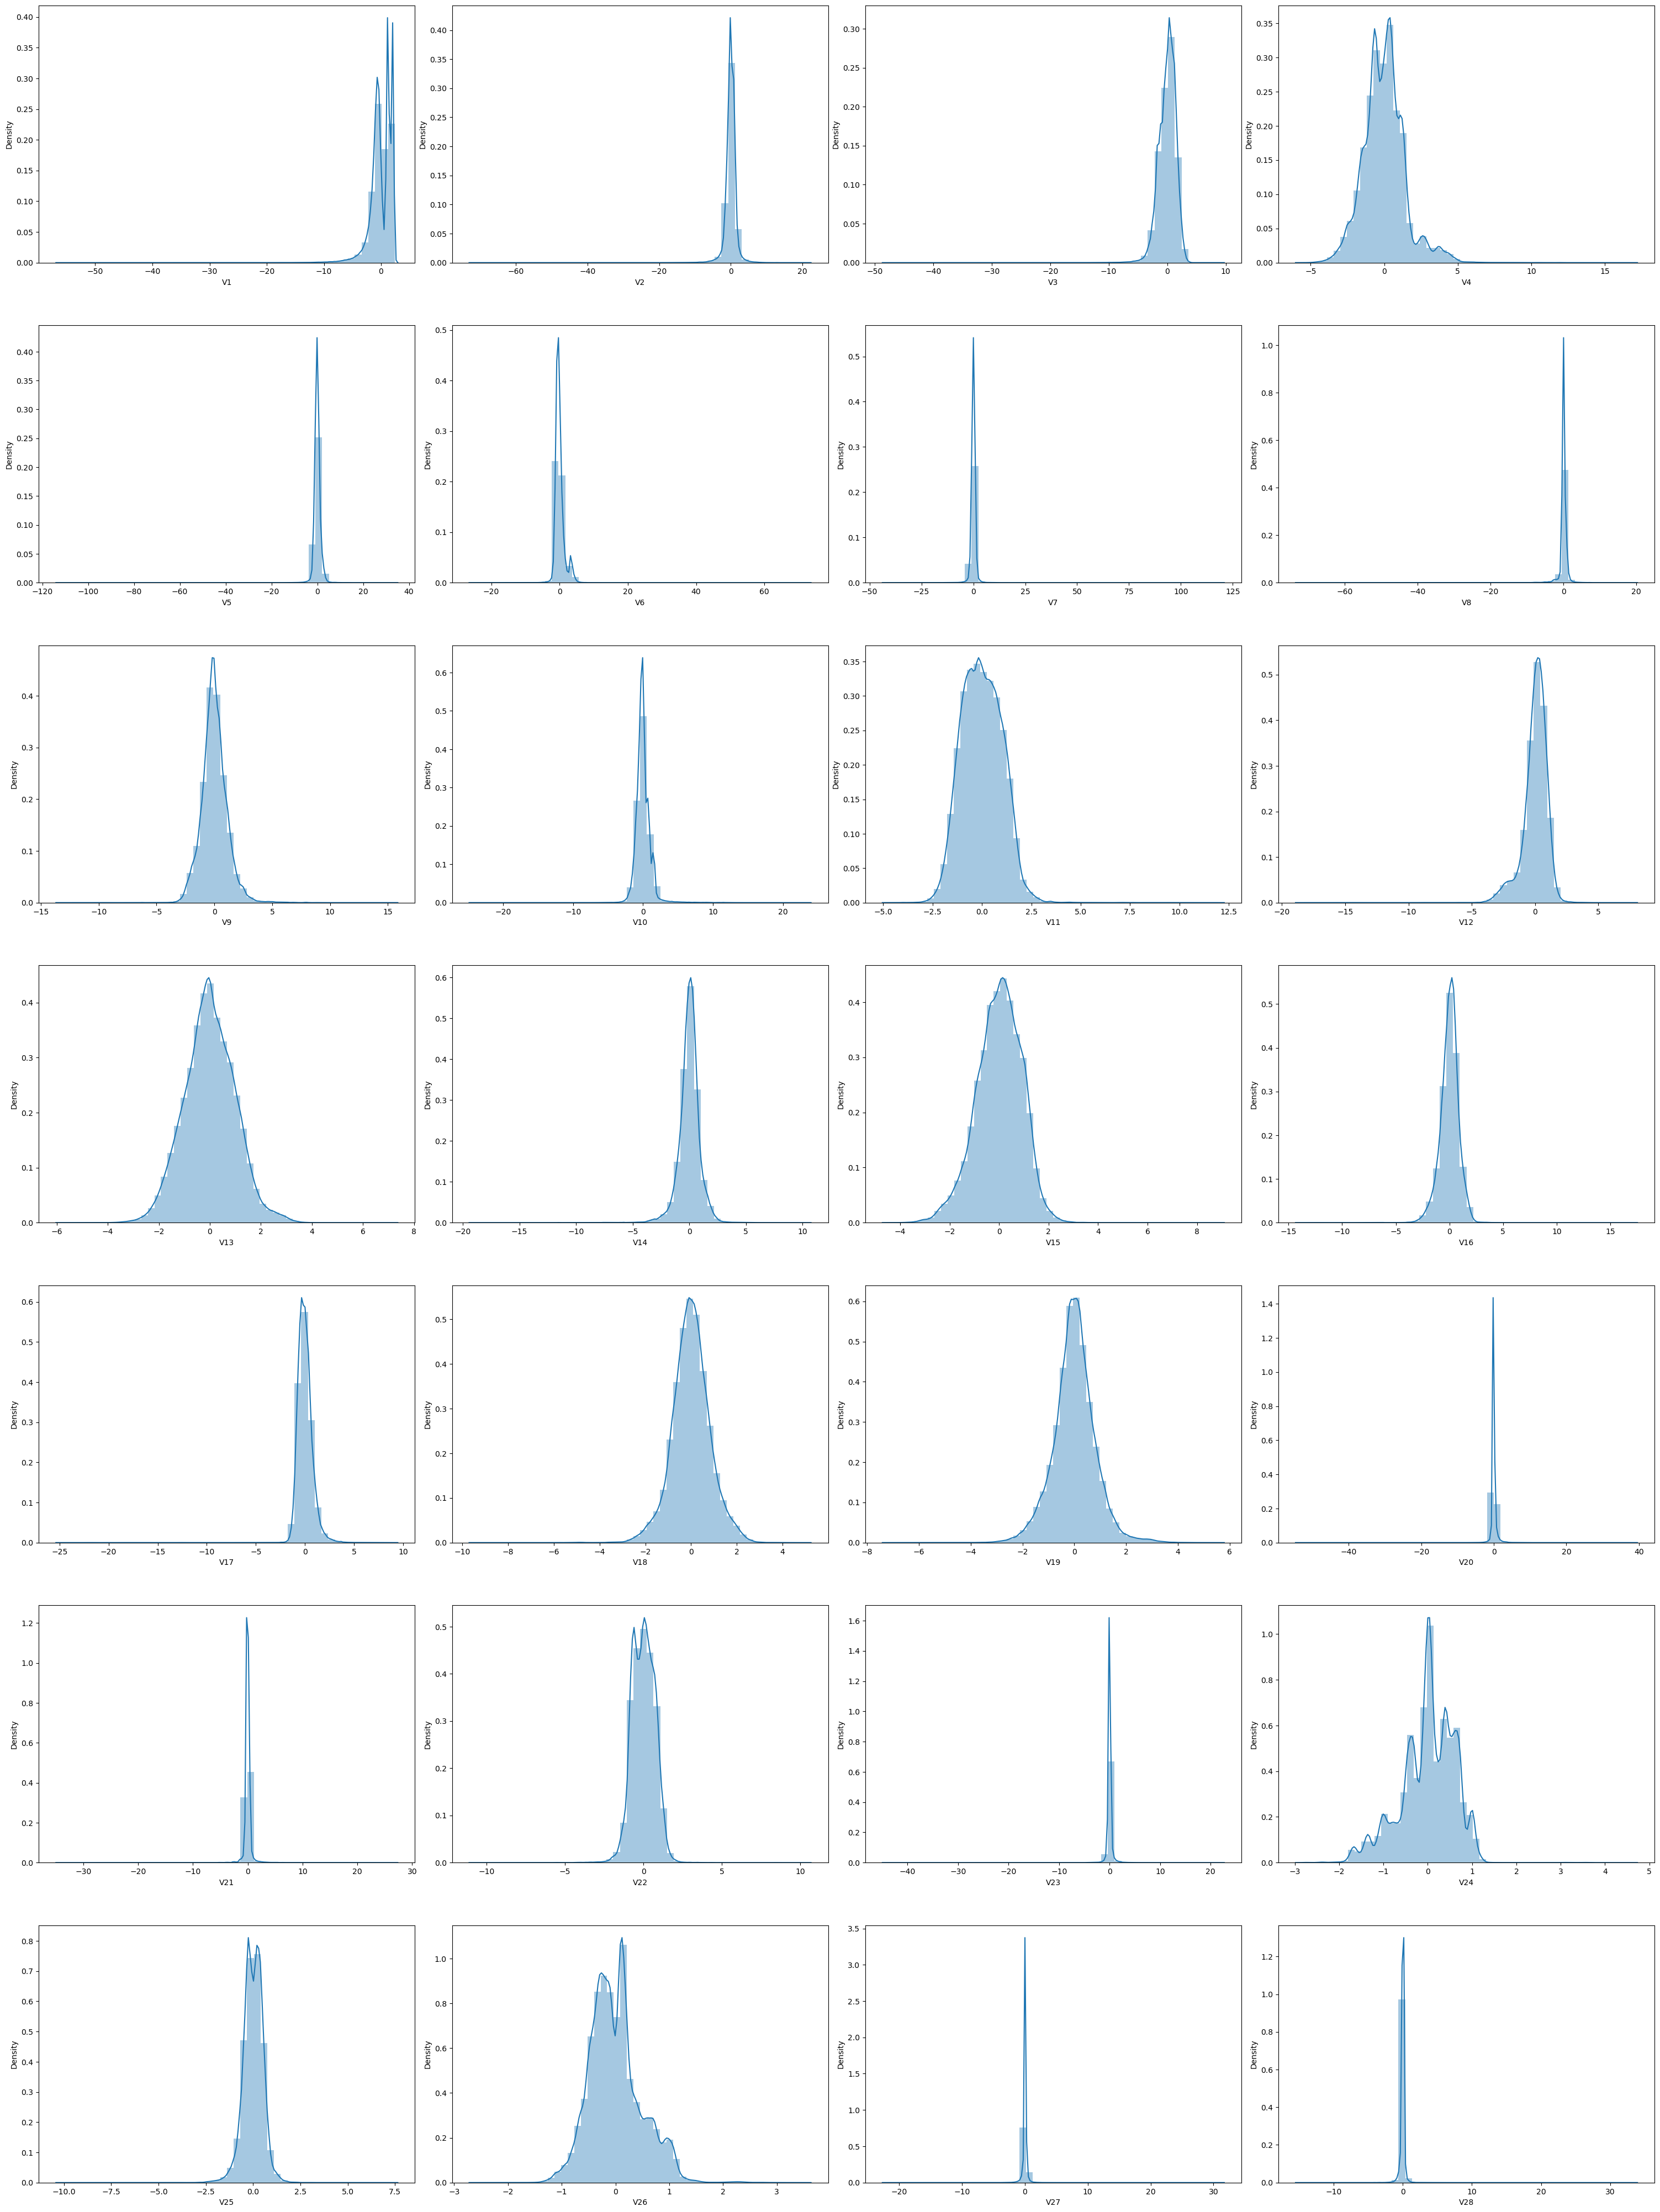

In [8]:
df_temp = df.drop(columns=['Time','Amount','Class'], axis =1)

#create dist plot
fig, ax = plt.subplots(ncols = 4, nrows = 7, figsize =(30,40))
index = 0
ax = ax.flatten()

for col in df_temp.columns:
    sns.distplot(df_temp[col], ax = ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad = 0.5, h_pad = 5)

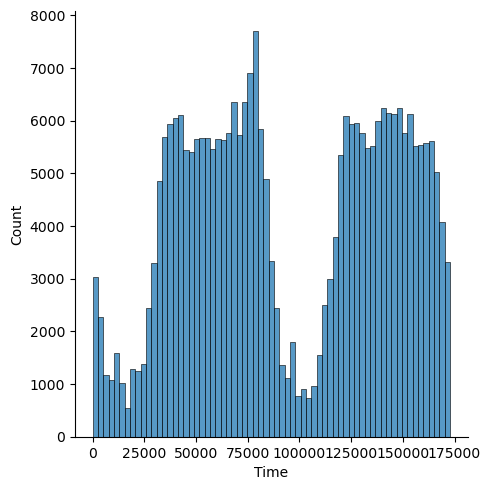

In [9]:
sns.displot(df['Time'])

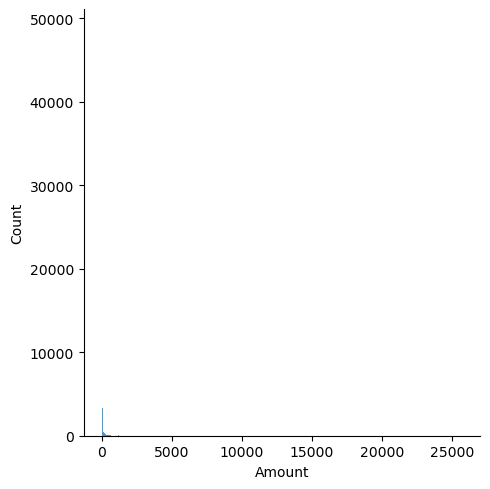

In [10]:
sns.displot(df['Amount'])

# Co-orelation Matrix

<Axes: >

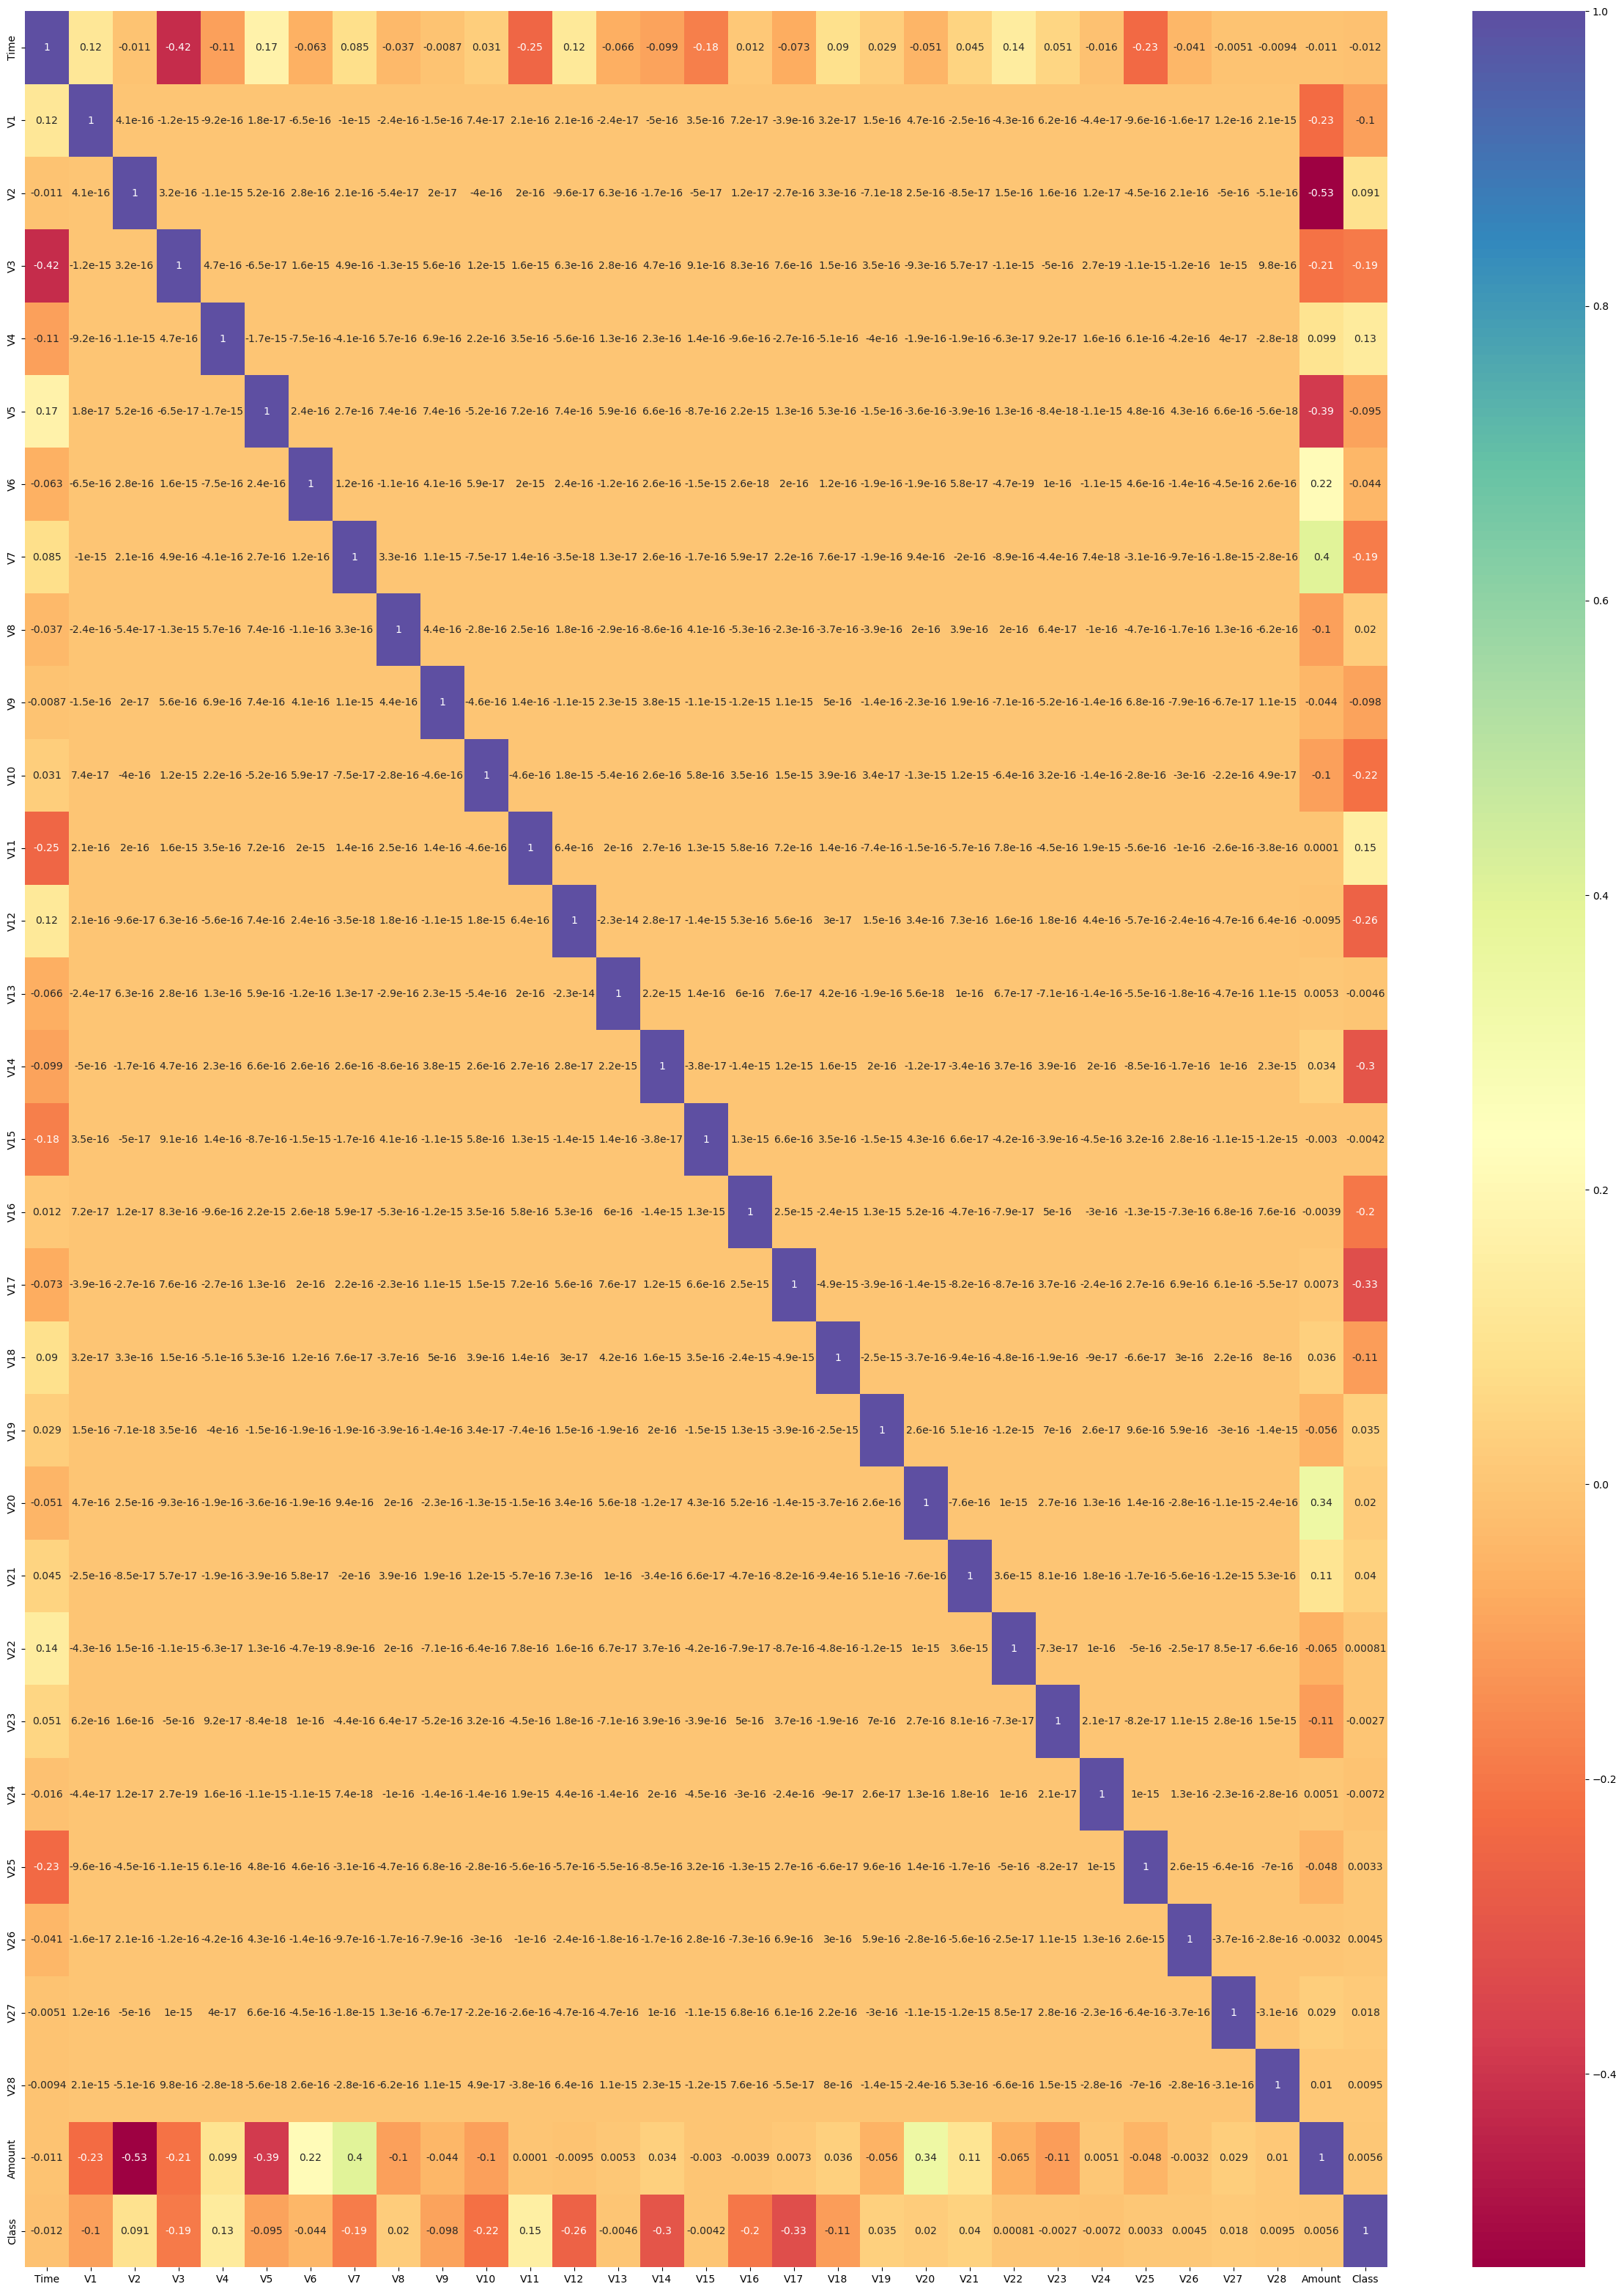

In [11]:
corr = df.corr()
plt.figure(figsize=(30,40))
sns.heatmap(corr, annot = True, cmap='Spectral')

# Input Split

In [12]:
X = df.drop(columns=['Class'], axis=1)
y = df['Class']

# Standard Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_sacler = sc.fit_transform(X)

In [14]:
x_sacler[-1]

array([ 1.64205773, -0.27233093, -0.11489898,  0.46386564, -0.35757   ,
       -0.00908946, -0.48760183,  1.27476937, -0.3471764 ,  0.44253246,
       -0.84072963, -1.01934641, -0.0315383 , -0.18898634, -0.08795849,
        0.04515766, -0.34535763, -0.77752147,  0.1997554 , -0.31462479,
        0.49673933,  0.35541083,  0.8861488 ,  0.6033653 ,  0.01452561,
       -0.90863123, -1.69685342, -0.00598394,  0.04134999,  0.51435531])

# Model Trainig

In [15]:
# train test spilt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
x_train, x_test, y_train, y_test = train_test_split(x_sacler, y, test_size = 0.25, random_state = 42, stratify = y)

In [16]:
#Logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

#training
model.fit(x_train, y_train)

#testing
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))
print("F1_Score: ",f1_score(y_test,y_pred)) # f1_score is combination off precisiion and recall

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.85      0.63      0.72       123

    accuracy                           1.00     71202
   macro avg       0.92      0.81      0.86     71202
weighted avg       1.00      1.00      1.00     71202

F1_Score:  0.719626168224299


##### f1_score is 0.71 which is not much reasonable. 


In [17]:
# Random forest
from sklearn.ensemble import RandomForestClassifier # this f1_score is better than logistics regresssion score 
model = RandomForestClassifier()

#training
model.fit(x_train, y_train)

#testing
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))
print("F1_Score: ",f1_score(y_test,y_pred)) # f1_score is combination off precisiion and recall

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.95      0.80      0.87       123

    accuracy                           1.00     71202
   macro avg       0.98      0.90      0.93     71202
weighted avg       1.00      1.00      1.00     71202

F1_Score:  0.8672566371681416


#### When its compaired with randomforest, logestic regression and Extreme Gradient Boosting(XGB), f1_score is better with XGB

In [18]:
from xgboost import XGBClassifier 
model = XGBClassifier(n_jobs=-1)

#training
model.fit(x_train, y_train)

#testing
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))
print("F1_Score: ",f1_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.94      0.79      0.86       123

    accuracy                           1.00     71202
   macro avg       0.97      0.89      0.93     71202
weighted avg       1.00      1.00      1.00     71202

F1_Score:  0.8584070796460177


# Class Imbalancement

<Axes: ylabel='count'>

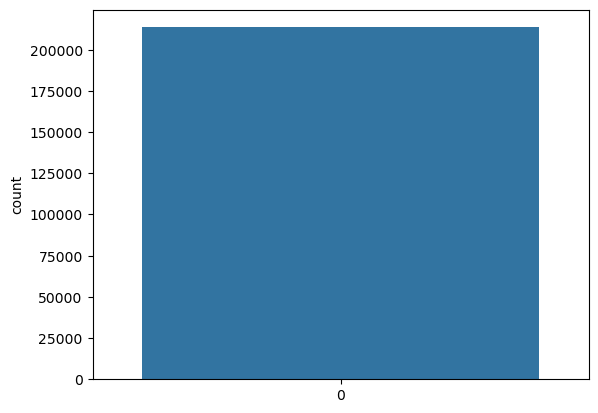

In [19]:
# ratio of the class x_train and y_train
sns.countplot(y_train) # to overcome this graph we will use the over sampling and undersampling

In [20]:
#balance the class with  equal distribution
from imblearn.over_sampling import SMOTE # over sampling 
over_sample = SMOTE()
x_smote, y_smote = over_sample.fit_resample(x_train,y_train)

<Axes: ylabel='count'>

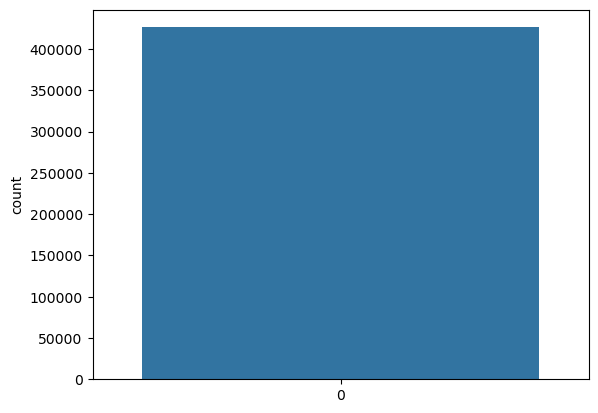

In [21]:
sns.countplot(y_smote)

In [22]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

#training
model.fit(x_smote, y_smote)

#testing
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))
print("F1_Score: ",f1_score(y_test,y_pred)) # f1_score is combination off precisiion and recall


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.06      0.89      0.11       123

    accuracy                           0.98     71202
   macro avg       0.53      0.93      0.55     71202
weighted avg       1.00      0.98      0.99     71202

F1_Score:  0.11156601842374617


In [23]:
# Random forest
from sklearn.ensemble import RandomForestClassifier # this f1_score is better than logistics regresssion score 
model = RandomForestClassifier(n_jobs=-1)

#training
model.fit(x_smote, y_smote)

#testing
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))
print("F1_Score: ",f1_score(y_test,y_pred)) # f1_score is combination off precisiion and recall

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.87      0.81      0.84       123

    accuracy                           1.00     71202
   macro avg       0.93      0.91      0.92     71202
weighted avg       1.00      1.00      1.00     71202

F1_Score:  0.8403361344537815


In [24]:
from xgboost import XGBClassifier #
model = XGBClassifier(n_jobs=-1)

#training
model.fit(x_smote, y_smote)

#testing
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))
print("F1_Score: ",f1_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.73      0.85      0.79       123

    accuracy                           1.00     71202
   macro avg       0.87      0.93      0.89     71202
weighted avg       1.00      1.00      1.00     71202

F1_Score:  0.7894736842105263


#### f1_score after applying XGBClassifier is lesser than RandomForestClassifier before imbalancement